In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
## Drop the year, day and month

df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [8]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [9]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
## Encoding

df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [11]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [12]:
df.tail(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [13]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [14]:
## Divide features into dependent and independent feature

X = df.drop("FWI", axis=1)
y = df['FWI']

In [15]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
y_train = t_train

In [18]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [19]:
## Feature selction based on correaltion

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

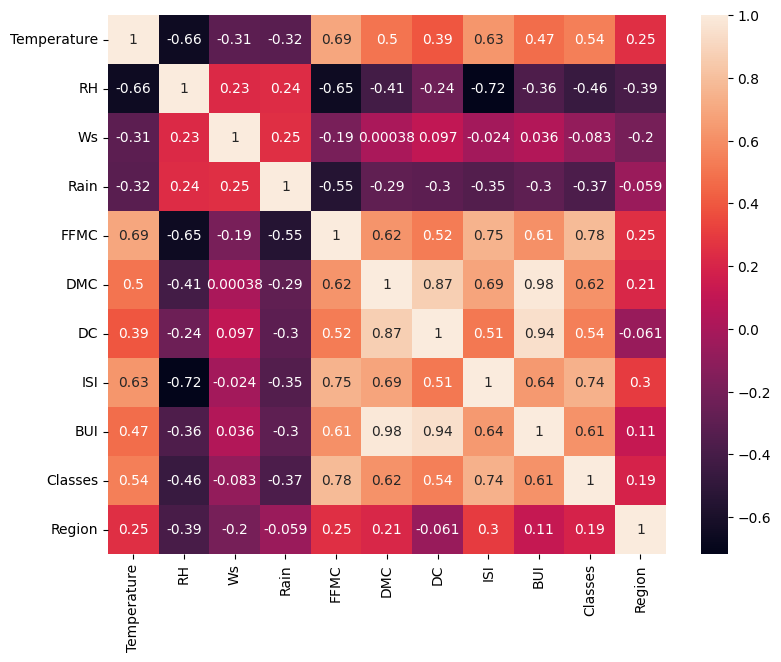

In [20]:
## Check for multi colinearity

plt.figure(figsize=(9, 7))
corr_betn_features = X_train.corr()
sns.heatmap(corr_betn_features, annot=True)

In [21]:
def correaltion(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
## Threshold is set by domain expertise

corr_features = correaltion(X_train, 0.85)

In [23]:
## Drop the features when correlation is more than 85%

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature scaling and standardization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

## Box plots to understand the effect of standard scaler

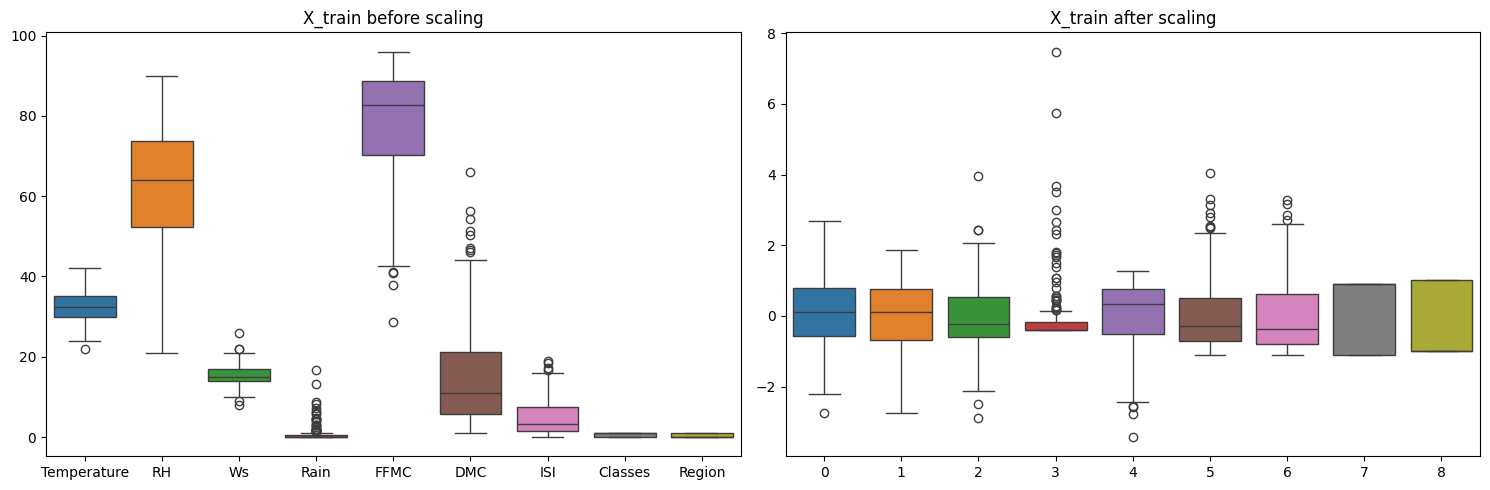

In [26]:
# plt.subplots(figsize=(15, 5))

# plt.subplot(1, 2, 1)
# sns.boxplot(data = X_train)
# plt.title('X_train before scaling')

# plt.subplot(1, 2, 2)
# sns.boxplot(data = X_train_scaled)
# plt.title('X_train After scaling')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title('X_train before scaling')

sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title('X_train after scaling')

plt.tight_layout()
plt.show()

# Linear regression model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)


y_pred = linreg.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error : ", mae)
print("R2_score :", score)

Mean Absolute Error :  0.5468236465249978
R2_score : 0.9847657384266951


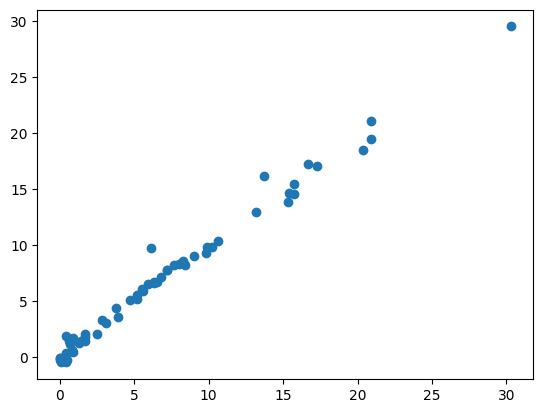

In [28]:
plt.scatter(y_test, y_pred)

Mean Absolute Error :  0.619970115826343
R2_score : 0.9820946715928275


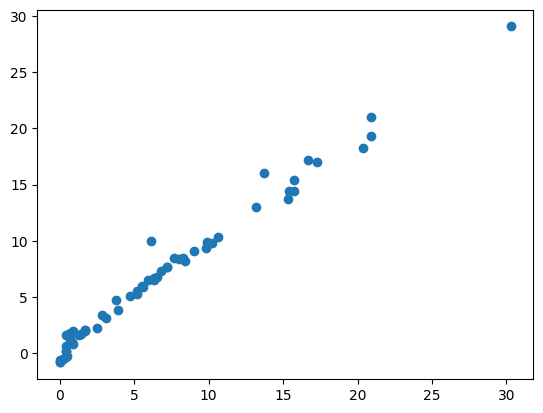

In [29]:
from sklearn.linear_model import LassoCV

Lasso_CV = LassoCV(cv=5)
Lasso_CV.fit(X_train_scaled, y_train)

y_pred_lasso_cv = Lasso_CV.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lasso_cv)
score = r2_score(y_test, y_pred_lasso_cv)

print("Mean Absolute Error : ", mae)
print("R2_score :", score)

plt.scatter(y_test, y_pred_lasso_cv)

# Lasso regression

Mean Absolute Error :  1.133175994914409
R2_score : 0.9492020263112388


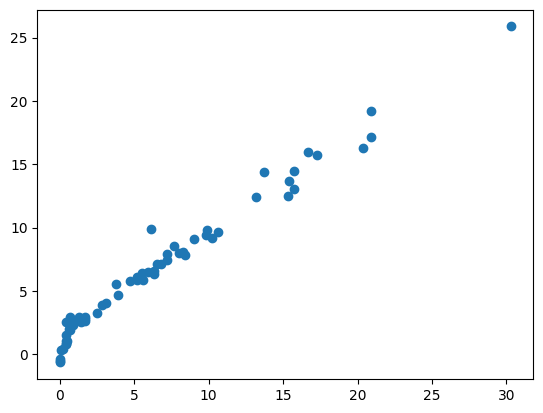

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train)


y_pred_lasso = lasso_reg.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred_lasso)
score = r2_score(y_test, y_pred_lasso)

print("Mean Absolute Error : ", mae)
print("R2_score :", score)

plt.scatter(y_test, y_pred_lasso)

Mean Absolute Error :  0.6477329167800895
R2_score : 0.9818260162432577


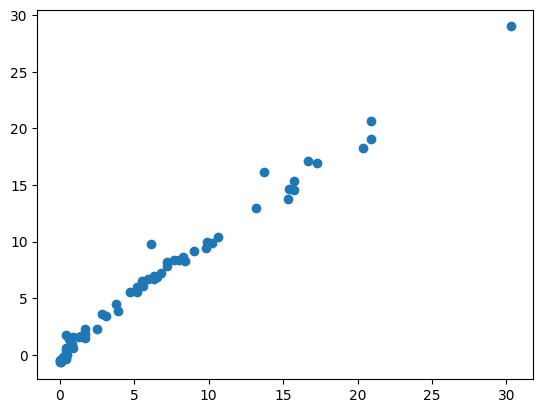

In [32]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 50)

Ridge_CV = RidgeCV(alphas = alphas, cv=5)
Ridge_CV.fit(X_train_scaled, y_train)

y_pred_Ridge_CV = Ridge_CV.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_Ridge_CV)
score = r2_score(y_test, y_pred_Ridge_CV)

print("Mean Absolute Error : ", mae)
print("R2_score :", score)

plt.scatter(y_test, y_pred_Ridge_CV)

# Ridge regression

Mean Absolute Error :  0.5642305340105715
R2_score : 0.9842993364555512


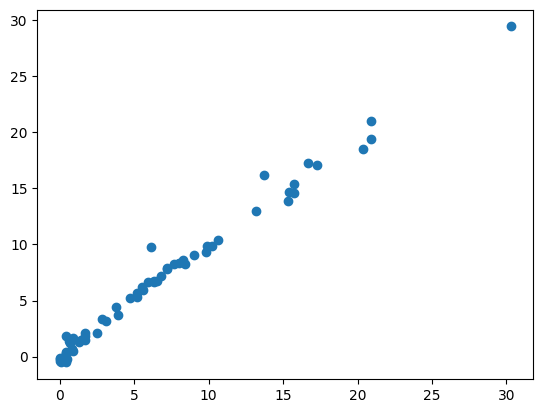

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Ridge_reg = Ridge()
Ridge_reg.fit(X_train_scaled, y_train)


y_pred_Ridge = Ridge_reg.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred_Ridge)
score = r2_score(y_test, y_pred_Ridge)

print("Mean Absolute Error : ", mae)
print("R2_score :", score)

plt.scatter(y_test, y_pred_Ridge)

# Elastic net regression

Mean Absolute Error :  1.8822353634896005
R2_score : 0.8753460589519703


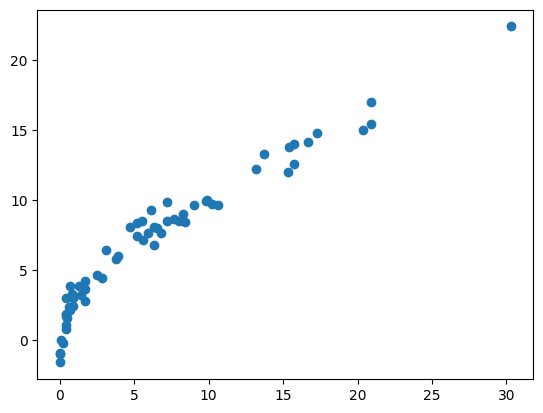

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ElasticNet_reg = ElasticNet()
ElasticNet_reg.fit(X_train_scaled, y_train)


y_pred_ElasticNet = ElasticNet_reg.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred_ElasticNet)
score = r2_score(y_test, y_pred_ElasticNet)

print("Mean Absolute Error : ", mae)
print("R2_score :", score)

plt.scatter(y_test, y_pred_ElasticNet)

Mean Absolute Error :  0.6460861869873501
R2_score : 0.9818225570776522


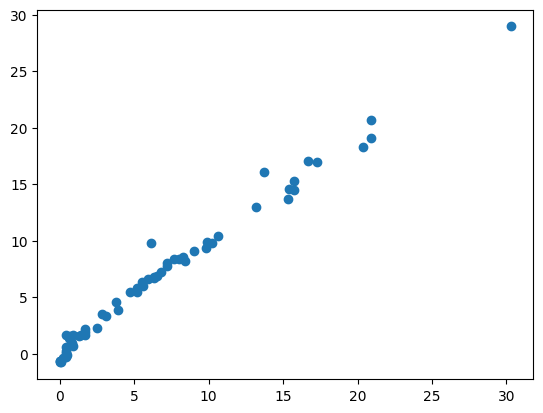

In [35]:
from sklearn.linear_model import ElasticNetCV

alphas = np.logspace(-3, 3, 50)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 1]


Elastic_net_CV = ElasticNetCV(
    alphas=alphas,
    l1_ratio=l1_ratios,
    cv=5,
    max_iter=10000
)
Elastic_net_CV.fit(X_train_scaled, y_train)

y_pred_Elastic_net_CV = Elastic_net_CV.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_Elastic_net_CV)
score = r2_score(y_test, y_pred_Elastic_net_CV)

print("Mean Absolute Error : ", mae)
print("R2_score :", score)

plt.scatter(y_test, y_pred_Elastic_net_CV)

## Pickel the model, preprocessing model and standardscaler

In [37]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [39]:
Ridge_reg

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [40]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(Ridge_reg, open('Ridge_regression.pkl', 'wb'))